 ___
# Atividade: TH para $\mu$ com $\sigma^2$ desconhecida
___

## Aula 19

**Preparo Prévio:**
1. Magalhães e Lima, seção 8.2. Final. Erro do tipo beta e função poder
1. Magalhães e Lima, seção 8.3. Testes com variância desconhecida
1. Montogmery. Seção 4-4.2 - Erro tipo 2 e tamanho de amostra
1. Montogmery. Seção 4-5 - Inferência com variância desconhecida

**Hoje:**
1. Expandir o Teste de Hipóteses para situações com $\sigma^2$ desconhecida

**Próxima aula:**
1. Magalhães e Lima, seção 7.4. Concentrar-se em intervalo de confiança para média amostra
1. Bootstrapping - https://www.thoughtco.com/example-of-bootstrapping-3126155
1. Bootstrapping - https://www.stat.auckland.ac.nz/~wild/BootAnim/
___

In [2]:
%matplotlib inline
%reset -f

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

# Simulação 1 - Teórico vs Amostral: #

1. Repita 10000 vezes:
    1. Gerar 10 números aleatórios com distribuição $N(0,1)$
    1. Calcular o desvio padrão usando std() e adicionar na lista L1.
    1. Calcular o desvio padrão usando std(ddof=1) e adicionar na lista L2.
1. Calcule as médias de L1 e L2. Compare.

In [3]:
L1 = []
L2 = []
for i in range(10000):
    X = stats.norm.rvs(loc=0, scale=1, size=10)
    L1.append(X.std())
    L2.append(X.std(ddof=1))
print(np.mean(L1))
print(np.mean(L2))

0.927154191962
0.977306329591


___
# Simulação 2 - Normal vs T-Student #

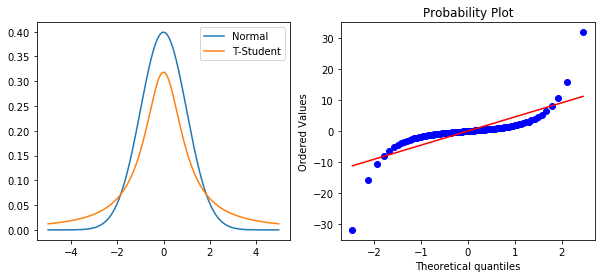

In [4]:
#Se não visualizar o pywidgets:
#conda install -c conda-forge ipywidgets

#Função que utiliza o pywidget
@interact(graus_lib = (1, 32, 1))
def f(graus_lib = 1):
    
    #Prints
    fig = plt.figure(figsize=(10,4))
    
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    
    #Fit e print da pdf
    x = np.arange(-5, 5, 0.01)
    ax1.plot(x, stats.norm.pdf(x, loc=0, scale=1))
    ax1.plot(x, stats.t.pdf(x, df=graus_lib, loc=0, scale=1))
    ax1.legend(['Normal', 'T-Student'])
    
    #QQ-Plot
    stats.probplot(stats.t.ppf(np.arange(0.01, 1, 0.01), df=graus_lib), dist=stats.norm, sparams=(0, 1), plot=ax2)
    
    

___
# Exercício 1 #

Realizar o teste de hipóteses no problema dos resistores novamente, mas considerando o desvio padrão desconhecido.

In [5]:
n=36
mu=350
s=10.5
loc=mu
scale=s/(n**(1/2))

In [6]:
#Bicaldal
a = stats.t.ppf(0.025,n-1,loc,scale)
print(a)

346.447311126


In [7]:
a = stats.t.ppf(0.975,n-1,loc,scale)
print(a)

353.552688874


In [8]:
#Unicaldal
a = stats.t.ppf(0.025,n-1,loc,scale)
print(a)


346.447311126


In [9]:
a = stats.t.cdf(347.043248206,n-1,loc,scale)
print(a*100)

5.00000003927


In [10]:
b = stats.t.cdf(347,n-1,loc,scale)
print(b*100)

4.76601586859


In [11]:
print(a*100-b*100)

0.233984170677


# Definição Beta
Quando você diz que não tem problema mas na realidade tem problema.
Você não rejeita H0 mas ele é falso.
Quanto mais longe o x/ estiver do linear da região crítica menor a probabilidade de cometer esse erro.


___
# Exercício 2 #

Realizar o teste de hipóteses no problema do refrigerante, conforme apontado nos slides da Aula.